# Importing necessary libraries and dataset loading

In [2]:
from dataset_loader_function import load_dataset, load_cleaned_dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = load_cleaned_dataset()

e:\githubProjects\Ahmed_Manzim_Ridwan_APF_Project_WiSe_2024_25\scripts\dataset_loader_function.py:7: DtypeWarning: Columns (12,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../dataset/dataset_cleaned.csv')


In [4]:
# damage_categories = df["damage"].unique()
df.columns.sort_values()

Index(['apn', 'assessed_value', 'battalion', 'cal_fire_unit', 'city',
       'community', 'county', 'damage', 'damaged_outbuildings',
       'deck_porch_elevated', 'deck_porch_grade', 'defense_actions',
       'distance_propane_tank', 'distance_residence_utility', 'eaves',
       'exterior_siding', 'fence_attached', 'fire_cause',
       'fire_name_secondary', 'fire_start_location', 'global_id',
       'hazard_type', 'incident_name', 'incident_number',
       'incident_start_date', 'latitude', 'longitude',
       'non_damaged_outbuildings', 'object_id', 'patio_cover_carport',
       'roof_construction', 'site_address', 'state', 'street_name',
       'street_number', 'street_suffix', 'street_type', 'structure_category',
       'structure_type', 'units_in_structure', 'vent_screen', 'window_pane',
       'x_coordinate', 'y_coordinate', 'year_built', 'zip_code'],
      dtype='object')

In [5]:
# import_libraries()
# Define relevant columns
selected_columns = [
    'incident_number', 'incident_name', 'fire_start_location', 'incident_start_date', 'fire_cause',
    'latitude', 'longitude', 'x_coordinate', 'y_coordinate', 'county', 'city', 'state',
    'damage', 'damaged_outbuildings', 'non_damaged_outbuildings', 'assessed_value',
    'structure_type', 'units_in_structure'
]

# Filter dataset
df_selected = df[selected_columns]

# Convert 'incident_start_date' to datetime format
# df_selected['incident_start_date'] = pd.to_datetime(df_selected['incident_start_date'], errors='coerce')

# Display dataset info and first few rows
# df_selected.info()
df_selected.head(1)


,incident_number,incident_name,fire_start_location,incident_start_date,fire_cause,latitude,longitude,x_coordinate,y_coordinate,county,city,state,damage,damaged_outbuildings,non_damaged_outbuildings,assessed_value,structure_type,units_in_structure
0,CALNU 008419,Quail,NaN,2020-06-06,NaN,38.47496,-122.044465,-1.358593e+07,4646740.75,Solano,Winters,CA,No Damage,NaN,NaN,510000.0,Single Family Residence Multi Story,1.0


In [6]:
df_selected['incident_start_date'] = pd.to_datetime(df_selected['incident_start_date'], errors='coerce')
df_selected.dtypes

C:\Users\manzi\AppData\Local\Temp\ipykernel_5368\1713756677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['incident_start_date'] = pd.to_datetime(df_selected['incident_start_date'], errors='coerce')


incident_number                     object
incident_name                       object
fire_start_location                 object
incident_start_date         datetime64[ns]
fire_cause                          object
latitude                           float64
longitude                          float64
x_coordinate                       float64
y_coordinate                       float64
county                              object
city                                object
state                               object
damage                              object
damaged_outbuildings               float64
non_damaged_outbuildings           float64
assessed_value                     float64
structure_type                      object
units_in_structure                 float64
dtype: object

## idenfity the fire attributes columns

In [7]:
# Define selected columns for analysis
selected_columns = [
    'incident_number', 'incident_name', 'fire_start_location', 'incident_start_date', 'fire_cause',
    'latitude', 'longitude', 'x_coordinate', 'y_coordinate', 'county', 'city', 'state',
    'damage', 'damaged_outbuildings', 'non_damaged_outbuildings', 'assessed_value',
    'structure_type', 'units_in_structure', 'vent_screen', 'window_pane', 'roof_construction',
    'deck_porch_elevated', 'deck_porch_grade', 'fence_attached'
]

# Create filtered dataset
df_selected = df[selected_columns].copy()

df_selected['incident_start_date'] = pd.to_datetime(df_selected['incident_start_date'], errors='coerce')
# df_selected.dtypes

# Display dataset info to confirm selection
# df_selected.info()
# df_selected.head()


## Fire Spread Over Time Analysis

### Fire Incident Count Per Year

In [8]:
# First, drop rows with invalid incident_start_date (i.e., NaT)
df_selected = df_selected.dropna(subset=['incident_start_date'])

# Extract year from the 'incident_start_date' column
df_selected['year'] = df_selected['incident_start_date'].dt.year

# Count number of incidents per year
fires_per_year = df_selected.groupby('year')['incident_number'].count().reset_index()

# Rename column for clarity
fires_per_year.rename(columns={'incident_number': 'Fire Count'}, inplace=True)

# Display the result
print(fires_per_year.to_string(index=False))


 year  Fire Count
 2013         280
 2014         310
 2015        3193
 2016         944
 2017       12757
 2018       28403
 2019        2108
 2020       28626
 2021       10299
 2024        6519


### Identify Peak Fire Seasons (Monthly Trends)

In [9]:
# First, drop rows with invalid incident_start_date (i.e., NaT)
# df_selected = df_selected.dropna(subset=['incident_start_date'])

# Extract month from the 'incident_start_date' column
df_selected['month'] = df_selected['incident_start_date'].dt.month

# Count number of incidents per month
fires_per_month = df_selected.groupby('month')['incident_number'].count().reset_index()

# Rename column for clarity
fires_per_month.rename(columns={'incident_number': 'Fire Count'}, inplace=True)

# Display the result
print(fires_per_month.to_string(index=False))


 month  Fire Count
     2          59
     5          62
     6         846
     7       10040
     8       19624
     9       18416
    10       13931
    11       27390
    12        3071


### Yearly Fire Trends

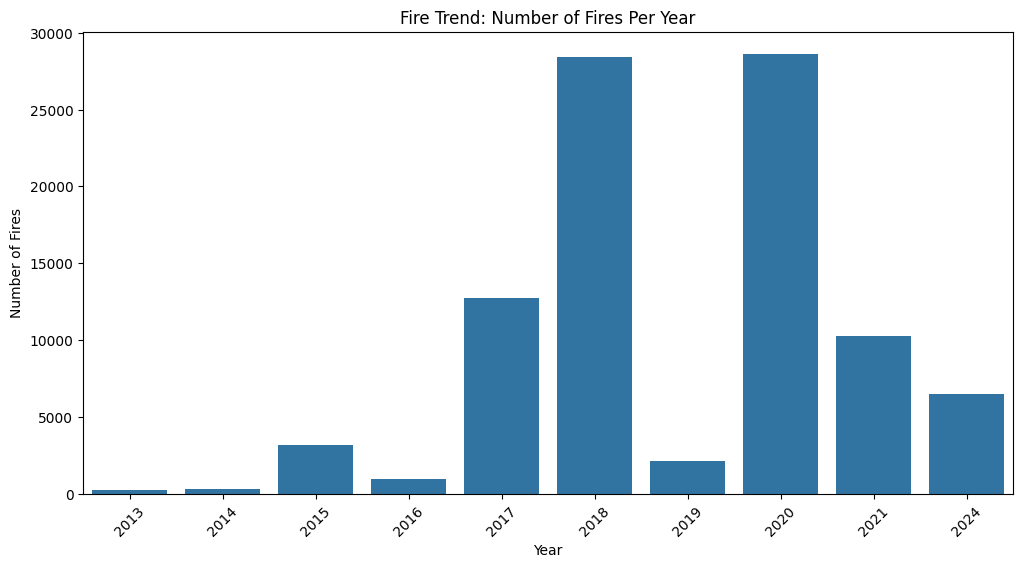

In [10]:
# %matplotlib inline  # Use this for static images
# or
# %matplotlib notebook  # Use this for interactive plots

plt.figure(figsize=(12, 6))

sns.barplot(x='year', y='Fire Count', data=fires_per_year)   

# Set the title and labels
plt.title('Fire Trend: Number of Fires Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')

# Display the plot
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.show()

### Monthly trends

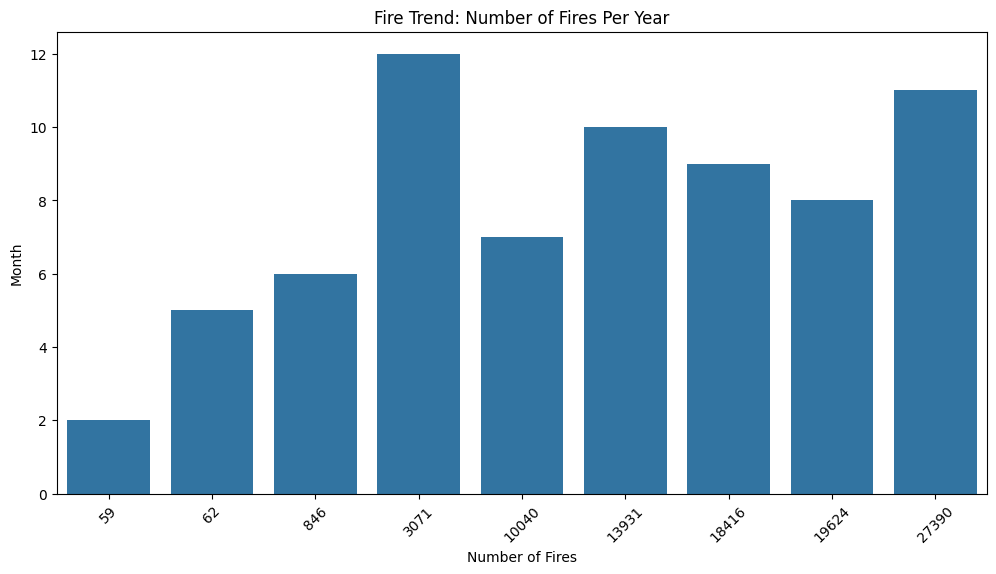

In [11]:
plt.figure(figsize=(12, 6))

# sns.barplot(x='month', y='Fire Count', data=fires_per_month)
sns.barplot(x='Fire Count', y='month', data=fires_per_month)

# Set the title and labels
plt.title('Fire Trend: Number of Fires Per Year')
plt.xlabel('Number of Fires')
plt.ylabel('Month')

# Display the plot
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.show()


In [12]:
### Summary

In [13]:
peak_years = fires_per_year.nlargest(5, 'Fire Count')
peak_months = fires_per_month.nlargest(5, 'Fire Count') 

# print('Top 5 years with the highest number of fires: \n', peak_years)
# print('Top 5 months with the highest number of fires: \n', peak_months)

## Interative plot on the basis of month and year 
### Please zoom in where the data seems small

### Fire Count per Month 

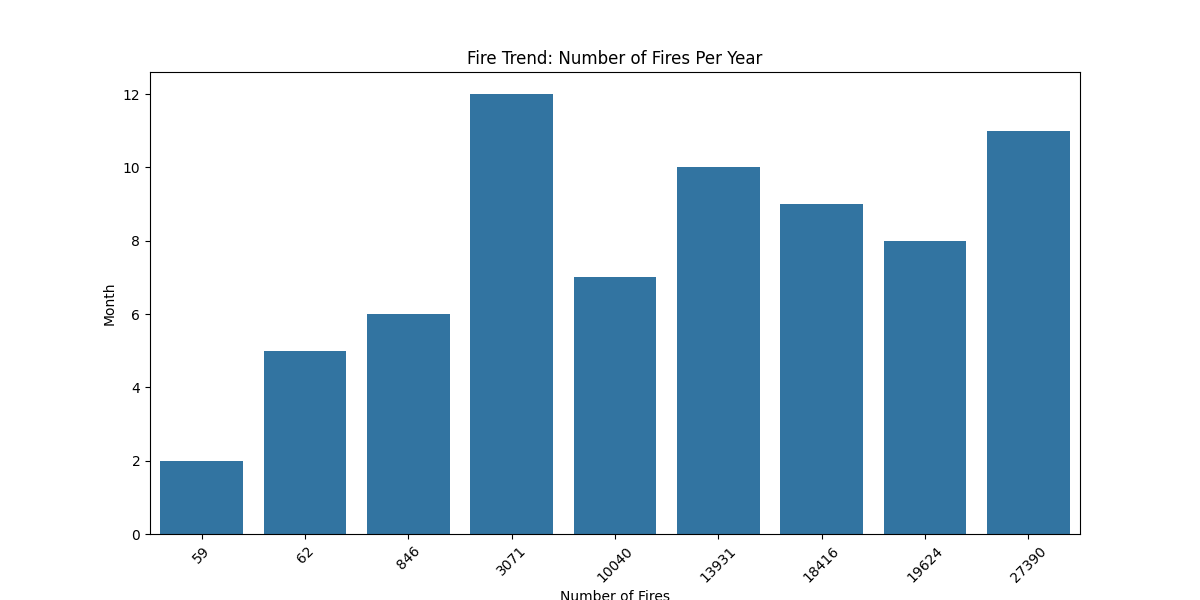

In [14]:
%matplotlib widget

# Create an interactive figure
fig, ax = plt.subplots(figsize=(12, 6))

# Horizontal bar plot for Fire Count per Month
sns.barplot(x='Fire Count', y='month', data=fires_per_month, ax=ax)

# Set the title and labels
ax.set_title('Fire Trend: Number of Fires Per Year')
ax.set_xlabel('Number of Fires')
ax.set_ylabel('Month')

# Rotate X-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Display the interactive plot
plt.show()


### Fire Count per Year 

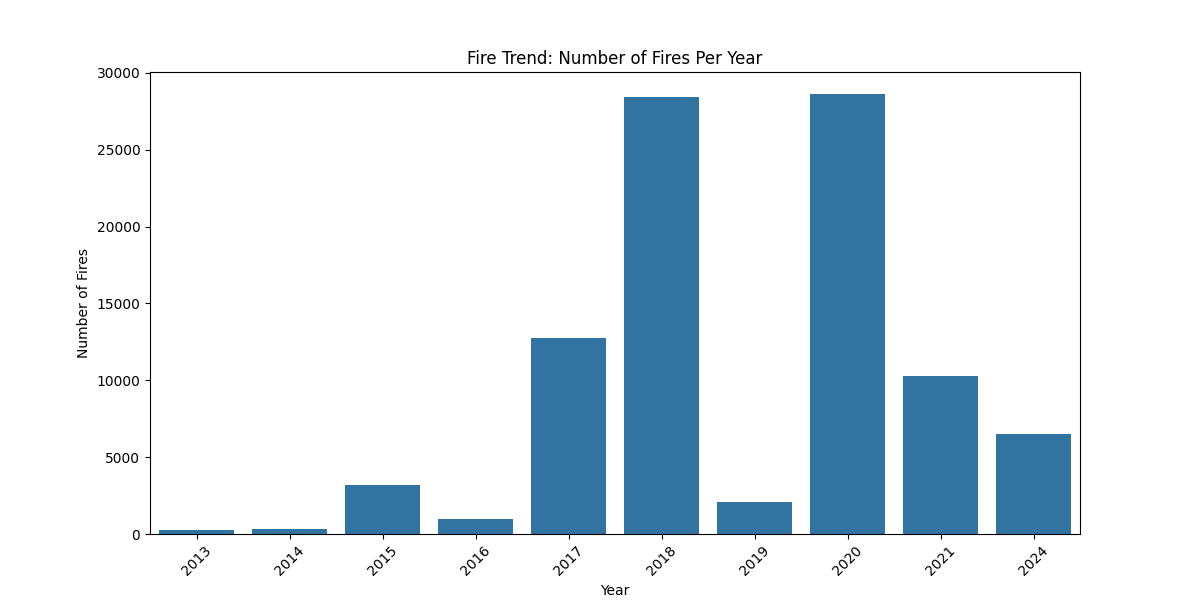

In [15]:
%matplotlib widget

# Create an interactive figure
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for Fire Count per Year
sns.barplot(x='year', y='Fire Count', data=fires_per_year, ax=ax)

# Set the title and labels
ax.set_title('Fire Trend: Number of Fires Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Fires')

# Rotate X-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Display the interactive plot
plt.show()

## Interpretation

### Compare with Environmental Data → Temperature & Humidity Analysis

In [16]:
# Convert fire start date to datetime if not already done
df_selected['incident_start_date'] = pd.to_datetime(df_selected['incident_start_date'], errors='coerce')

# Extract year from fire incidents
df_selected['year'] = df_selected['incident_start_date'].dt.year

# Sample environmental dataset (replace with actual data)
# df_env = pd.DataFrame({'year': [2018, 2019, 2020], 'avg_temp': [35, 37, 38], 'avg_humidity': [30, 25, 20]})

# Merge fire data with environmental data on 'year'
fire_weather = df_selected.groupby('year')['incident_number'].count().reset_index()
fire_weather.rename(columns={'incident_number': 'Fire Count'}, inplace=True)
fire_weather = fire_weather.merge(df_selected, on='year', how='left')

print(fire_weather.head(2))  # Check merged data


   year  Fire Count incident_number incident_name fire_start_location  \
0  2013         280    CASHU 008265        Clover                 NaN   
1  2013         280    CARRU 079781        Silver                 NaN   

  incident_start_date fire_cause   latitude   longitude  x_coordinate  ...  \
0          2013-09-09        NaN  40.488398 -122.511895 -1.363796e+07  ...   
1          2013-08-07        NaN  33.871821 -116.832461 -1.300573e+07  ...   

   assessed_value                        structure_type units_in_structure  \
0             0.0                Utility Misc Structure                NaN   
1             NaN  Single Family Residence Single Story                NaN   

  vent_screen window_pane  roof_construction  deck_porch_elevated  \
0         NaN         NaN                NaN                        
1         NaN         NaN                NaN                        

   deck_porch_grade fence_attached  month  
0                              NaN      9  
1             